# Business Understanding

In big ecommerce businesses customer segmentation and clustering is importnat so our main objective is to find patterns in this data which can get benifit to company in segmentize and target there audience more accurately.

* Increasing revenue (Knowing customers who present most of our revenue)
* Increasing customer retention
* Discovering Trends and patterns
* Defining customers at risk

# Objective
The target will be to identify different customer segments and customer profiles using unsupervised machine learning techniques.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline
import numpy as np
import pandas as pd
import math
import sklearn
import sklearn.preprocessing
import datetime
import os
import matplotlib.pyplot as plt
import tensorflow as tf

from sklearn.metrics import silhouette_samples, silhouette_score
from pandas.plotting import scatter_matrix

from sklearn.cluster import MiniBatchKMeans
import warnings
warnings.filterwarnings("ignore")

In [4]:
#Load Dataset
df = pd.read_csv("OnlineRetail.csv", encoding='ISO-8859–1')
rank=pd.read_csv("Ranking.csv")

In [5]:
rank

,product,count,rank
0,4 PURPLE FLOCK DINNER CANDLES,10,5.000000
1,50'S CHRISTMAS GIFT BAG LARGE,10,5.001539
2,DOLLY GIRL BEAKER,10,5.003078
3,I LOVE LONDON MINI BACKPACK,10,5.004617
4,NINE DRAWER OFFICE TIDY,10,5.006156
...,...,...,...
3243,ZINC T-LIGHT HOLDER STARS SMALL,1638,9.990766
3244,ZINC TOP 2 DOOR WOODEN SHELF,1727,9.992305
3245,ZINC WILLIE WINKIE CANDLE STICK,2159,9.993844
3246,ZINC WIRE KITCHEN ORGANISER,2200,9.995383


In [8]:
rank.head()

,product,count,rank
0,4 PURPLE FLOCK DINNER CANDLES,10,5.000000
1,50'S CHRISTMAS GIFT BAG LARGE,10,5.001539
2,DOLLY GIRL BEAKER,10,5.003078
3,I LOVE LONDON MINI BACKPACK,10,5.004617
4,NINE DRAWER OFFICE TIDY,10,5.006156


In [9]:
merged_left = pd.merge(left=df, right=rank, how='left', left_on='Description', right_on='product')
merged_left

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Rating,category,product,count,rank
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,3,serve,WHITE HANGING HEART T-LIGHT HOLDER,593.0,9.775315
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,3,dine,WHITE METAL LANTERN,600.0,9.784549
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,4,dine,CREAM CUPID HEARTS COAT HANGER,33.0,6.094183
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,0,serve,KNITTED UNION FLAG HOT WATER BOTTLE,85.0,7.293013
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,5,storage,RED WOOLLY HOTTIE WHITE HEART.,175.0,8.518006
...,...,...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France,5,dine,PACK OF 20 SPACEBOY NAPKINS,120.0,7.877809
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France,2,storage,CHILDREN'S APRON DOLLY GIRL,28.0,5.872576
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France,3,dine,CHILDRENS CUTLERY DOLLY GIRL,28.0,5.878732
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France,1,storage,CHILDRENS CUTLERY CIRCUS PARADE,28.0,5.877193


In [10]:
merged_left.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
Rating              0
category            0
product          5003
count            5003
rank             5003
dtype: int64

In [11]:
merged_left.dropna(inplace=True,axis=0)

In [12]:
merged_left.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
Rating         0
category       0
product        0
count          0
rank           0
dtype: int64

In [13]:
merged_left.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 404569 entries, 0 to 541908
Data columns (total 13 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    404569 non-null  object 
 1   StockCode    404569 non-null  object 
 2   Description  404569 non-null  object 
 3   Quantity     404569 non-null  int64  
 4   InvoiceDate  404569 non-null  object 
 5   UnitPrice    404569 non-null  float64
 6   CustomerID   404569 non-null  float64
 7   Country      404569 non-null  object 
 8   Rating       404569 non-null  int64  
 9   category     404569 non-null  object 
 10  product      404569 non-null  object 
 11  count        404569 non-null  float64
 12  rank         404569 non-null  float64
dtypes: float64(4), int64(2), object(7)
memory usage: 43.2+ MB


In [14]:
merged_left

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Rating,category,product,count,rank
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,3,serve,WHITE HANGING HEART T-LIGHT HOLDER,593.0,9.775315
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,3,dine,WHITE METAL LANTERN,600.0,9.784549
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,4,dine,CREAM CUPID HEARTS COAT HANGER,33.0,6.094183
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,0,serve,KNITTED UNION FLAG HOT WATER BOTTLE,85.0,7.293013
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,5,storage,RED WOOLLY HOTTIE WHITE HEART.,175.0,8.518006
...,...,...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France,5,dine,PACK OF 20 SPACEBOY NAPKINS,120.0,7.877809
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France,2,storage,CHILDREN'S APRON DOLLY GIRL,28.0,5.872576
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France,3,dine,CHILDRENS CUTLERY DOLLY GIRL,28.0,5.878732
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France,1,storage,CHILDRENS CUTLERY CIRCUS PARADE,28.0,5.877193


In [15]:
merged_left.shape

(404569, 13)

In [16]:
valid_set_size_percentage = 10 
test_set_size_percentage = 10 

In [17]:
print (df.columns)

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'Rating', 'category'],
      dtype='object')


In [18]:
#shape of our dataset
print("The shape of our dataset is: ", merged_left.shape)

The shape of our dataset is:  (404569, 13)


In [19]:
# Finding top Unique Country and its no. of entries
merged_left["Country"].value_counts().head()

United Kingdom    359770
Germany             9478
France              8482
EIRE                7434
Spain               2526
Name: Country, dtype: int64

In [20]:
merged_left['InvoiceDate']= pd.to_datetime(merged_left['InvoiceDate']) 

In [21]:
#Some data Stats
merged_left.info() # information

<class 'pandas.core.frame.DataFrame'>
Int64Index: 404569 entries, 0 to 541908
Data columns (total 13 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    404569 non-null  object        
 1   StockCode    404569 non-null  object        
 2   Description  404569 non-null  object        
 3   Quantity     404569 non-null  int64         
 4   InvoiceDate  404569 non-null  datetime64[ns]
 5   UnitPrice    404569 non-null  float64       
 6   CustomerID   404569 non-null  float64       
 7   Country      404569 non-null  object        
 8   Rating       404569 non-null  int64         
 9   category     404569 non-null  object        
 10  product      404569 non-null  object        
 11  count        404569 non-null  float64       
 12  rank         404569 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(2), object(6)
memory usage: 43.2+ MB


In [22]:
#DS_3.describe() #Summary Stastics

# By looking at this we can see that our data has some negative values and this may be because of the returned or cancelled orders.

In [23]:
#exploring the unique values of each attribute
print("Number of transactions: ", merged_left['InvoiceNo'].nunique())
print("Number of products bought: ",merged_left['StockCode'].nunique())
print("Number of customers:", merged_left['CustomerID'].nunique() )
print("Percentage of customers ID which are not available: ", round(merged_left['CustomerID'].isnull().sum() * 100 / len(df),2),"%" )
print('Number of countries: ',merged_left['Country'].nunique())

Number of transactions:  22147
Number of products bought:  3144
Number of customers: 4371
Percentage of customers ID which are not available:  0.0 %
Number of countries:  37


In [24]:
#get canceled transactions
cancelled_orders = merged_left[merged_left['InvoiceNo'].astype(str).str.contains('C')]
cancelled_orders.shape

(8828, 13)

In [25]:
total_orders = merged_left['InvoiceNo'].nunique()
cancelled_number = len(cancelled_orders)
print('Percentage of orders canceled: {}/{} ({:.2f}%) '.format(cancelled_number, total_orders, cancelled_number/total_orders*100))

Percentage of orders canceled: 8828/22147 (39.86%) 


In [26]:
npin =merged_left.groupby(['InvoiceNo','CustomerID'],as_index=False)['InvoiceDate'].count()
inv_up = npin.rename(columns = {'InvoiceDate':'Number of products'})
inv_up.head()

,InvoiceNo,CustomerID,Number of products
0,536365,17850.0,7
1,536366,17850.0,2
2,536367,13047.0,11
3,536368,13047.0,4
4,536369,13047.0,1


In [27]:
inv_up.describe()

,CustomerID,Number of products
count,22147.000000,22147.000000
mean,15237.928117,18.267440
std,1733.540122,23.790657
min,12346.000000,1.000000
25%,13754.500000,3.000000
50%,15135.000000,12.000000
75%,16746.000000,24.000000
max,18287.000000,541.000000


By looking into it we see that most of the people i.e. 75% buy upto 24 products or less.

# Column Cost Calculation

In [28]:
merged_left['Total_Cost'] = merged_left['Quantity'] * merged_left['UnitPrice']

In [29]:
merged_left

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Rating,category,product,count,rank,Total_Cost
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,3,serve,WHITE HANGING HEART T-LIGHT HOLDER,593.0,9.775315,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,3,dine,WHITE METAL LANTERN,600.0,9.784549,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,4,dine,CREAM CUPID HEARTS COAT HANGER,33.0,6.094183,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,0,serve,KNITTED UNION FLAG HOT WATER BOTTLE,85.0,7.293013,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,5,storage,RED WOOLLY HOTTIE WHITE HEART.,175.0,8.518006,20.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,5,dine,PACK OF 20 SPACEBOY NAPKINS,120.0,7.877809,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,2,storage,CHILDREN'S APRON DOLLY GIRL,28.0,5.872576,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,3,dine,CHILDRENS CUTLERY DOLLY GIRL,28.0,5.878732,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,1,storage,CHILDRENS CUTLERY CIRCUS PARADE,28.0,5.877193,16.60


In [30]:
def weighted_rating(x, m=m, C=C):
    v = x['Total_Cost']
    R = x['rank']
    # Calculation based on the IMDB formula
    return (v/(v+m) * R) + (m/(m+v) * C)

NameError: name 'm' is not defined

In [31]:
merged_left['score'] = merged_left.apply(weighted_rating, axis=1)
merged_left

NameError: name 'weighted_rating' is not defined

In [32]:
merged_left.drop(['Description', 'Quantity','count'], axis = 1)

,InvoiceNo,StockCode,InvoiceDate,UnitPrice,CustomerID,Country,Rating,category,product,rank,Total_Cost
0,536365,85123A,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,3,serve,WHITE HANGING HEART T-LIGHT HOLDER,9.775315,15.30
1,536365,71053,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,3,dine,WHITE METAL LANTERN,9.784549,20.34
2,536365,84406B,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,4,dine,CREAM CUPID HEARTS COAT HANGER,6.094183,22.00
3,536365,84029G,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,0,serve,KNITTED UNION FLAG HOT WATER BOTTLE,7.293013,20.34
4,536365,84029E,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,5,storage,RED WOOLLY HOTTIE WHITE HEART.,8.518006,20.34
...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,2011-12-09 12:50:00,0.85,12680.0,France,5,dine,PACK OF 20 SPACEBOY NAPKINS,7.877809,10.20
541905,581587,22899,2011-12-09 12:50:00,2.10,12680.0,France,2,storage,CHILDREN'S APRON DOLLY GIRL,5.872576,12.60
541906,581587,23254,2011-12-09 12:50:00,4.15,12680.0,France,3,dine,CHILDRENS CUTLERY DOLLY GIRL,5.878732,16.60
541907,581587,23255,2011-12-09 12:50:00,4.15,12680.0,France,1,storage,CHILDRENS CUTLERY CIRCUS PARADE,5.877193,16.60


In [33]:
merged_left.describe()

,Quantity,UnitPrice,CustomerID,Rating,count,rank,Total_Cost
count,404569.000000,404569.000000,404569.000000,404569.000000,404569.00000,404569.000000,404569.000000
mean,12.071931,3.452614,15286.844914,2.885584,166.51239,7.577277,20.297873
std,172.485775,69.489417,1713.906081,1.728546,198.01949,1.397759,199.288302
min,-74215.000000,0.000000,12346.000000,0.000000,10.00000,5.000000,-77183.600000
25%,2.000000,1.250000,13952.000000,1.000000,45.00000,6.449677,4.200000
50%,5.000000,1.950000,15152.000000,3.000000,98.00000,7.520776,11.250000
75%,12.000000,3.750000,16791.000000,4.000000,209.00000,8.748846,19.500000
max,74215.000000,38970.000000,18287.000000,5.000000,2369.00000,9.996922,77183.600000


In [34]:
merged_left

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Rating,category,product,count,rank,Total_Cost
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,3,serve,WHITE HANGING HEART T-LIGHT HOLDER,593.0,9.775315,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,3,dine,WHITE METAL LANTERN,600.0,9.784549,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,4,dine,CREAM CUPID HEARTS COAT HANGER,33.0,6.094183,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,0,serve,KNITTED UNION FLAG HOT WATER BOTTLE,85.0,7.293013,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,5,storage,RED WOOLLY HOTTIE WHITE HEART.,175.0,8.518006,20.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,5,dine,PACK OF 20 SPACEBOY NAPKINS,120.0,7.877809,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,2,storage,CHILDREN'S APRON DOLLY GIRL,28.0,5.872576,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,3,dine,CHILDRENS CUTLERY DOLLY GIRL,28.0,5.878732,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,1,storage,CHILDRENS CUTLERY CIRCUS PARADE,28.0,5.877193,16.60


In [35]:
rating_count = pd.DataFrame(merged_left.groupby('StockCode')['rank'].count())
rating_count.sort_values('rank', ascending=False).head()

,rank
StockCode,
85123A,2070
22423,1905
85099B,1662
84879,1418
47566,1416


In [36]:
most_rated_books = pd.DataFrame(['85123A', '22423', '85099B', '84879', '47566'], index=np.arange(5), columns = ['StockCode'])
most_rated_books_summary = pd.merge(most_rated_books, merged_left, on='StockCode')
most_rated_books_summary

,StockCode,InvoiceNo,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Rating,category,product,count,rank,Total_Cost
0,85123A,536365,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,3,serve,WHITE HANGING HEART T-LIGHT HOLDER,593.0,9.775315,15.30
1,85123A,536373,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 09:02:00,2.55,17850.0,United Kingdom,4,storage,WHITE HANGING HEART T-LIGHT HOLDER,593.0,9.775315,15.30
2,85123A,536375,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 09:32:00,2.55,17850.0,United Kingdom,5,storage,WHITE HANGING HEART T-LIGHT HOLDER,593.0,9.775315,15.30
3,85123A,536390,WHITE HANGING HEART T-LIGHT HOLDER,64,2010-12-01 10:19:00,2.55,17511.0,United Kingdom,4,dine,WHITE HANGING HEART T-LIGHT HOLDER,593.0,9.775315,163.20
4,85123A,536394,WHITE HANGING HEART T-LIGHT HOLDER,32,2010-12-01 10:39:00,2.55,13408.0,United Kingdom,4,storage,WHITE HANGING HEART T-LIGHT HOLDER,593.0,9.775315,81.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8466,47566,580937,PARTY BUNTING,4,2011-12-06 14:13:00,4.95,16143.0,United Kingdom,4,serve,PARTY BUNTING,131.0,8.002462,19.80
8467,47566,581142,PARTY BUNTING,3,2011-12-07 13:38:00,4.95,14204.0,United Kingdom,1,utensils,PARTY BUNTING,131.0,8.002462,14.85
8468,47566,581345,PARTY BUNTING,5,2011-12-08 12:15:00,4.95,17315.0,United Kingdom,3,dine,PARTY BUNTING,131.0,8.002462,24.75
8469,47566,581417,PARTY BUNTING,8,2011-12-08 15:01:00,4.95,13013.0,United Kingdom,5,storage,PARTY BUNTING,131.0,8.002462,39.60


In [37]:
average_rating = pd.DataFrame(merged_left.groupby('StockCode')['rank'].mean())
average_rating['Rating'] = pd.DataFrame(merged_left.groupby('StockCode')['rank'].count())
average_rating.sort_values('Rating', ascending=False).head()

,rank,Rating
StockCode,,
85123A,9.775315,2070
22423,8.524161,1905
85099B,7.236073,1662
84879,5.281625,1418
47566,8.002462,1416


In [38]:
counts1 = merged_left['CustomerID'].value_counts()
ratings = merged_left[merged_left['CustomerID'].isin(counts1[counts1 >= 200].index)]
counts = ratings['rank'].value_counts()
ratings = ratings[ratings['rank'].isin(counts[counts >= 100].index)]

In [39]:
merged_left

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Rating,category,product,count,rank,Total_Cost
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,3,serve,WHITE HANGING HEART T-LIGHT HOLDER,593.0,9.775315,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,3,dine,WHITE METAL LANTERN,600.0,9.784549,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,4,dine,CREAM CUPID HEARTS COAT HANGER,33.0,6.094183,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,0,serve,KNITTED UNION FLAG HOT WATER BOTTLE,85.0,7.293013,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,5,storage,RED WOOLLY HOTTIE WHITE HEART.,175.0,8.518006,20.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,5,dine,PACK OF 20 SPACEBOY NAPKINS,120.0,7.877809,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,2,storage,CHILDREN'S APRON DOLLY GIRL,28.0,5.872576,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,3,dine,CHILDRENS CUTLERY DOLLY GIRL,28.0,5.878732,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,1,storage,CHILDRENS CUTLERY CIRCUS PARADE,28.0,5.877193,16.60


In [40]:
merged_left

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Rating,category,product,count,rank,Total_Cost
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,3,serve,WHITE HANGING HEART T-LIGHT HOLDER,593.0,9.775315,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,3,dine,WHITE METAL LANTERN,600.0,9.784549,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,4,dine,CREAM CUPID HEARTS COAT HANGER,33.0,6.094183,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,0,serve,KNITTED UNION FLAG HOT WATER BOTTLE,85.0,7.293013,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,5,storage,RED WOOLLY HOTTIE WHITE HEART.,175.0,8.518006,20.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,5,dine,PACK OF 20 SPACEBOY NAPKINS,120.0,7.877809,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,2,storage,CHILDREN'S APRON DOLLY GIRL,28.0,5.872576,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,3,dine,CHILDRENS CUTLERY DOLLY GIRL,28.0,5.878732,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,1,storage,CHILDRENS CUTLERY CIRCUS PARADE,28.0,5.877193,16.60


In [41]:
columns=['InvoiceNo','Description','Quantity','InvoiceDate','UnitPrice','category','score','count','Total_Cost']
combine_book_rating = merged_left.drop(columns, axis=1)
combine_book_rating.head()

KeyError: "['score'] not found in axis"

In [42]:
combine_book_rating = combine_book_rating.dropna(axis = 0, subset = ['product'])

book_ratingCount = (combine_book_rating.
     groupby(by = ['product'])['Rating'].
     count().
     reset_index().
     rename(columns = {'Rating': 'totalRatingCount'})
     [['product', 'totalRatingCount']]
    )
book_ratingCount.head()

NameError: name 'combine_book_rating' is not defined

In [43]:
rating_with_totalRatingCount = combine_book_rating.merge(book_ratingCount, left_on = 'product', right_on = 'product', how = 'left')
rating_with_totalRatingCount.head()

NameError: name 'combine_book_rating' is not defined

In [44]:
print(book_ratingCount['totalRatingCount'].quantile(np.arange(.9, 1, .01)))

NameError: name 'book_ratingCount' is not defined

In [45]:
popularity_threshold = 50
rating_popular_book = rating_with_totalRatingCount.query('totalRatingCount >= @popularity_threshold')
rating_popular_book.head()

NameError: name 'rating_with_totalRatingCount' is not defined

In [46]:
users = merged_left[['CustomerID', 'Country']]
users

,CustomerID,Country
0,17850.0,United Kingdom
1,17850.0,United Kingdom
2,17850.0,United Kingdom
3,17850.0,United Kingdom
4,17850.0,United Kingdom
...,...,...
541904,12680.0,France
541905,12680.0,France
541906,12680.0,France
541907,12680.0,France


In [47]:
rating_popular_book['Country'].unique()

NameError: name 'rating_popular_book' is not defined

In [50]:
#combined = rating_popular_book.merge(users, left_on = 'CustomerID', right_on = 'CustomerID', how = 'left')

us_canada_user_rating = merged_left[merged_left['Country'].str.contains("United Kingdom|France|Australia|Netherlands|Germany")]
#us_canada_user_rating=us_canada_user_rating.drop('Age', axis=1)
us_canada_user_rating

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Rating,category,product,count,rank,Total_Cost
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,3,serve,WHITE HANGING HEART T-LIGHT HOLDER,593.0,9.775315,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,3,dine,WHITE METAL LANTERN,600.0,9.784549,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,4,dine,CREAM CUPID HEARTS COAT HANGER,33.0,6.094183,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,0,serve,KNITTED UNION FLAG HOT WATER BOTTLE,85.0,7.293013,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,5,storage,RED WOOLLY HOTTIE WHITE HEART.,175.0,8.518006,20.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,5,dine,PACK OF 20 SPACEBOY NAPKINS,120.0,7.877809,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,2,storage,CHILDREN'S APRON DOLLY GIRL,28.0,5.872576,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,3,dine,CHILDRENS CUTLERY DOLLY GIRL,28.0,5.878732,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,1,storage,CHILDRENS CUTLERY CIRCUS PARADE,28.0,5.877193,16.60


In [51]:
from scipy.sparse import csr_matrix
us_canada_user_rating = us_canada_user_rating.drop_duplicates(['CustomerID', 'product'])
us_canada_user_rating_pivot = us_canada_user_rating.pivot(index = 'product', columns = 'CustomerID', values = 'Rating').fillna(0)
us_canada_user_rating_matrix = csr_matrix(us_canada_user_rating_pivot.values)

from sklearn.neighbors import NearestNeighbors


model_rnn = NearestNeighbors(metric = 'cosine', algorithm = 'brute')
model_rnn.fit(us_canada_user_rating_matrix)

NearestNeighbors(algorithm='brute', leaf_size=30, metric='cosine',
                 metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                 radius=1.0)

In [54]:
us_canada_user_rating_pivot.iloc[query_index,:].values

array([0., 0., 0., ..., 0., 0., 0.])

In [53]:
query_index = np.random.choice(us_canada_user_rating_pivot.shape[0])
print(query_index)
distances, indices = model_rnn.kneighbors(us_canada_user_rating_pivot.iloc[query_index,:].values.reshape(1, -1), n_neighbors = 6)


1848


In [55]:
us_canada_user_rating_pivot

CustomerID,12346.0,12386.0,12388.0,12393.0,12413.0,12415.0,12422.0,12424.0,12426.0,12427.0,...,18273.0,18274.0,18276.0,18277.0,18278.0,18280.0,18281.0,18282.0,18283.0,18287.0
product,,,,,,,,,,,,,,,,,,,,,
4 PURPLE FLOCK DINNER CANDLES,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50'S CHRISTMAS GIFT BAG LARGE,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
DOLLY GIRL BEAKER,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
I LOVE LONDON MINI BACKPACK,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
NINE DRAWER OFFICE TIDY,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZINC T-LIGHT HOLDER STARS SMALL,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ZINC TOP 2 DOOR WOODEN SHELF,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ZINC WILLIE WINKIE CANDLE STICK,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [56]:
us_canada_user_rating_pivot.index[query_index]

'PACK OF 6 BIRDY GIFT TAGS'

# Recomendation

In [58]:
for i in range(0, len(distances.flatten())):
    if i == 0:
        print('Recommendations for {0}:\n'.format(us_canada_user_rating_pivot.index[query_index]))
    else:
        print('{0}: {1}, with distance of {2}:'.format(i, us_canada_user_rating_pivot.index[indices.flatten()[i]], distances.flatten()[i]))

Recommendations for PACK OF 6 BIRDY GIFT TAGS:

1: PACK OF 6 PANNETONE GIFT BOXES, with distance of 0.7610805819714201:
2: PACK 3 BOXES BIRD PANNETONE , with distance of 0.8085601539394531:
3: PACK OF 6 PANETTONE GIFT BOXES, with distance of 0.8326811643446639:
4: BUNDLE OF 3 ALPHABET EXERCISE BOOKS, with distance of 0.840885835840767:
5: 6 RIBBONS RUSTIC CHARM, with distance of 0.8437557753206014:


In [204]:
tfidf_matrix


<404569x1778 sparse matrix of type '<class 'numpy.float64'>'
	with 1637252 stored elements in Compressed Sparse Row format>

In [203]:
tfidf.get_feature_names()[5104569:5104569]

[]

In [53]:
from sklearn.metrics.pairwise import linear_kernel


In [25]:
merged_left.groupby('Country').sum().sort_values(by='Total_Cost', ascending=False).head()

,Quantity,UnitPrice,CustomerID,Rating,count,rank,Total_Cost
Country,,,,,,,
United Kingdom,3989353,1.167745e+06,5.593661e+09,1037793,60003386.0,2.723408e+06,6.686774e+06
Netherlands,199338,6.442380e+03,3.391226e+07,6791,372045.0,1.787418e+04,2.832029e+05
EIRE,134639,3.810618e+04,1.096434e+08,21513,1235902.0,5.620570e+04,2.464702e+05
Germany,117250,3.763893e+04,1.198586e+08,27442,1619745.0,7.299746e+04,2.214858e+05
France,109784,4.279747e+04,1.075307e+08,24486,1367196.0,6.516678e+04,1.964115e+05


We can see that these are the top 5 countries by the generation of revenue
Uk have the most then Netherlands,EIRE,Germany,France are us under respective

In [27]:
merged_left_uk = merged_left[merged_left['Country']=='United Kingdom']
merged_left_uk.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Rating,category,product,count,rank,Total_Cost
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,3,serve,WHITE HANGING HEART T-LIGHT HOLDER,593.0,9.775315,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,3,dine,WHITE METAL LANTERN,600.0,9.784549,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,4,dine,CREAM CUPID HEARTS COAT HANGER,33.0,6.094183,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,0,serve,KNITTED UNION FLAG HOT WATER BOTTLE,85.0,7.293013,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,5,storage,RED WOOLLY HOTTIE WHITE HEART.,175.0,8.518006,20.34


In [31]:
merged_left_uk['product'].unique

<bound method Series.unique of 0          WHITE HANGING HEART T-LIGHT HOLDER
1                         WHITE METAL LANTERN
2              CREAM CUPID HEARTS COAT HANGER
3         KNITTED UNION FLAG HOT WATER BOTTLE
4              RED WOOLLY HOTTIE WHITE HEART.
                         ...                 
541889         FAIRY TALE COTTAGE NIGHT LIGHT
541890    LARGE CAKE STAND  HANGING STRAWBERY
541891       SET OF 3 HANGING OWLS OLLIE BEAK
541892          RED RETROSPOT ROUND CAKE TINS
541893                  DOORMAT RED RETROSPOT
Name: product, Length: 359770, dtype: object>

In [27]:
# Which Products are most bought in UK
groupedproduct = merged_left.groupby('StockCode',as_index= False)['Quantity'].sum().sort_values(by='Quantity', ascending=False)
groupedproduct.head(10)

,StockCode,Quantity
2554,84077,53215
982,22197,48712
2865,85099B,45066
2733,84879,35314
2878,85123A,34147
358,21212,33409
1802,23084,27094
1242,22492,25880
1359,22616,25321
809,21977,24163


In [28]:
#Looking out for missing values and handling them
merged_left_uk.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
Rating         0
category       0
product        0
count          0
rank           0
Total_Cost     0
dtype: int64

In [29]:
merged_left_uk.Quantity[merged_left_uk.Quantity < 0]=np.nan
merged_left_uk.dropna(axis="index",subset=["Quantity"],inplace=True)
merged_left_uk["Quantity"]=merged_left_uk["Quantity"].astype("int64")

In [30]:
merged_left_uk.UnitPrice[merged_left_uk.UnitPrice < 0]=np.nan
merged_left_uk.dropna(axis="index",subset=["UnitPrice"],inplace=True)

In [31]:
# Checking Datatime length 
merged_left_uk["InvoiceDate"].max()-merged_left_uk["InvoiceDate"].min()

Timedelta('373 days 04:23:00')

By looking at this we can see that we can make it round to 365 days for 1 year

In [32]:
merged_left_uk = merged_left_uk[merged_left_uk['InvoiceDate']>= "2010-12-09"]

In [33]:
#exploring the unique values of each attribute
print("Number of transactions: ", merged_left_uk['InvoiceNo'].nunique())
print("Number of products bought: ",merged_left_uk['StockCode'].nunique())
print("Number of customers:", merged_left_uk['CustomerID'].nunique() )
print("Percentage of customers ID which are not available: ", round(merged_left_uk['CustomerID'].isnull().sum() * 100 / len(merged_left_uk),2),"%" )
print('Number of countries: ',merged_left_uk['Country'].nunique())

Number of transactions:  15995
Number of products bought:  3130
Number of customers: 3863
Percentage of customers ID which are not available:  0.0 %
Number of countries:  1


# RFM Analysis

RFM analysis (recency, frequency, monetary)

RFM (recency, frequency, monetary) analysis is a marketing technique used to determine quantitatively which customers are the best ones by examining how recently a customer has purchased (recency), how often they purchase (frequency), and how much the customer spends (monetary). RFM analysis is based on the marketing axiom that "80% of your business comes from 20% of your customers."

RECENCY (R): Days since last purchase
FREQUENCY (F): Total number of purchases
MONETARY VALUE (M): Total money this customer spent.
RFM helps divide customers into various categories or clusters to identify customers who are more likely to respond to promotions and also for future personalization services.

Although RFM analysis is a useful tool, it does have its limitations.

# Recency

In [34]:
import datetime as dt
cur_d=dt.date(2011,12,9)

In [35]:
#create a new column called date which contains the date of invoice only
merged_left_uk['Date'] = merged_left_uk['InvoiceDate'].dt.date
merged_left_uk.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Rating,category,product,count,rank,Total_Cost,Date
19632,537879,22114,HOT WATER BOTTLE TEA AND SYMPATHY,12,2010-12-09 08:34:00,3.95,14243.0,United Kingdom,5,serve,HOT WATER BOTTLE TEA AND SYMPATHY,75.0,7.114497,47.4,2010-12-09
19633,537879,22835,HOT WATER BOTTLE I AM SO POORLY,8,2010-12-09 08:34:00,4.65,14243.0,United Kingdom,5,utensils,HOT WATER BOTTLE I AM SO POORLY,75.0,7.109880,37.2,2010-12-09
19634,537879,85150,LADIES & GENTLEMEN METAL SIGN,6,2010-12-09 08:34:00,2.55,14243.0,United Kingdom,5,dine,LADIES & GENTLEMEN METAL SIGN,85.0,7.300708,15.3,2010-12-09
19635,537879,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,4,2010-12-09 08:34:00,7.95,14243.0,United Kingdom,2,storage,15CM CHRISTMAS GLASS BALL 20 LIGHTS,10.0,5.041551,31.8,2010-12-09
19636,537879,21524,DOORMAT SPOTTY HOME SWEET HOME,2,2010-12-09 08:34:00,7.95,14243.0,United Kingdom,3,dine,DOORMAT SPOTTY HOME SWEET HOME,39.0,6.300400,15.9,2010-12-09


In [36]:
#group by customers and check last date of purshace
recency_df = merged_left_uk.groupby(by='CustomerID', as_index=False)['Date'].max()
recency_df.columns = ['CustomerID','LastPurshaceDate']
#calculate recency
recency_df['Recency'] = recency_df['LastPurshaceDate'].apply(lambda x: (cur_d - x).days)
#drop LastPurchaseDate as we don't need it anymore
recency_df.drop('LastPurshaceDate',axis=1,inplace=True)

In [37]:
recency_df.head()

,CustomerID,Recency
0,12346.0,325
1,12747.0,2
2,12748.0,0
3,12749.0,3
4,12820.0,3


# Frequency

In [38]:
# drop duplicates
retailuk_copy = merged_left_uk.copy()
retailuk_copy.drop_duplicates(subset=['InvoiceNo', 'CustomerID'], keep="first", inplace=True)
#calculate frequency of purchases
frequency_df = retailuk_copy.groupby(by=['CustomerID'], as_index=False)['InvoiceNo'].count()
frequency_df.columns = ['CustomerID','Frequency']
frequency_df.head()

,CustomerID,Frequency
0,12346.0,1
1,12747.0,10
2,12748.0,196
3,12749.0,5
4,12820.0,4


# Monetary Value

In [39]:
monetary_df = merged_left_uk.groupby(by='CustomerID',as_index=False).agg({'Total_Cost': 'sum'})
monetary_df.columns = ['CustomerID','Monetary']
monetary_df.head()

,CustomerID,Monetary
0,12346.0,77183.60
1,12747.0,3837.45
2,12748.0,30895.87
3,12749.0,4090.88
4,12820.0,942.34


Mergeing all both of them 

In [40]:
#merge with monetary dataframe to get a table with the 3 columns
rf_df = recency_df.merge(frequency_df,on='CustomerID')
rfm_df = rf_df.merge(monetary_df,on='CustomerID')
#use CustomerID as index
rfm_df.set_index('CustomerID',inplace=True)
#check the head
rfm_df.head()

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,325,1,77183.60
12747.0,2,10,3837.45
12748.0,0,196,30895.87
12749.0,3,5,4090.88
12820.0,3,4,942.34


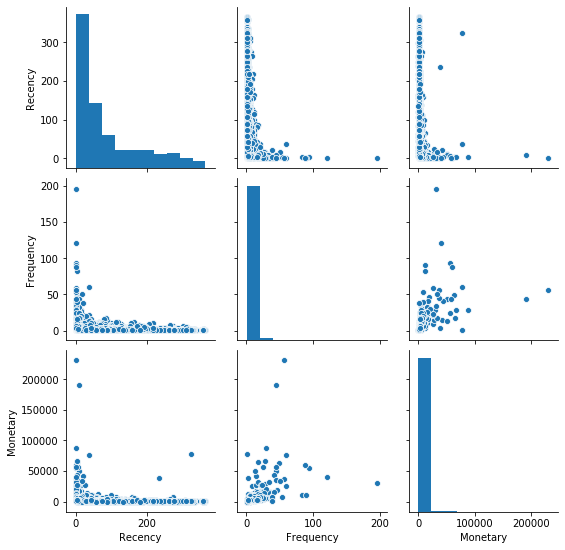

In [41]:
sns.pairplot(rfm_df)

# Correlation

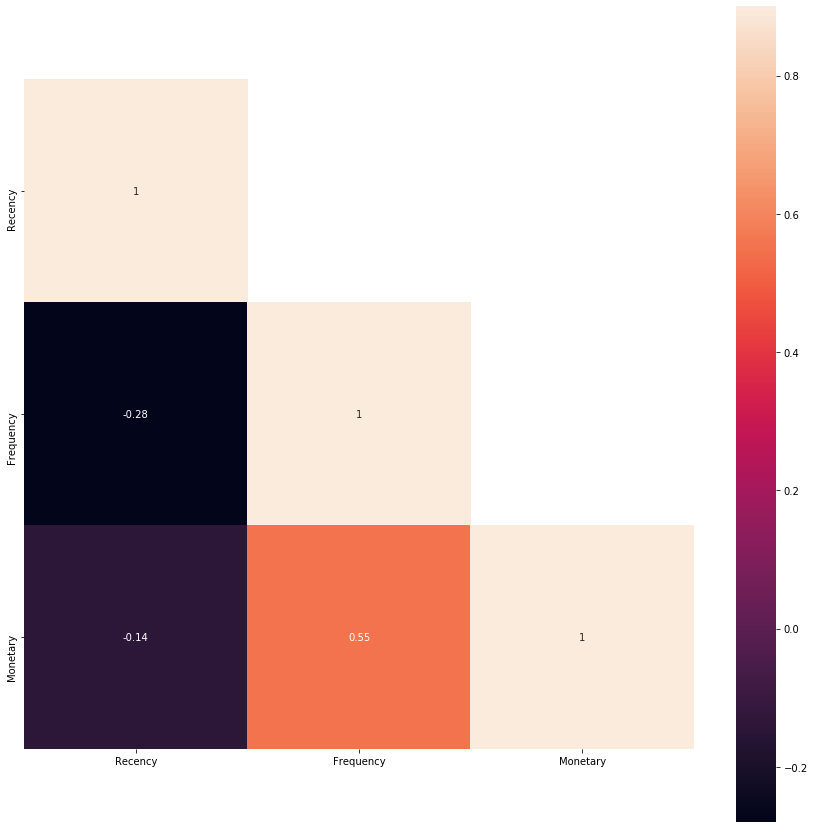

In [42]:
#create correlation
corr=rfm_df.corr()

#convert correlation to numpy array
mask = np.array(corr)

#to mask the repetitive value for each pair
mask[np.tril_indices_from(mask)] = False
fig, ax = plt.subplots(figsize = (15,12))
fig.set_size_inches(15,15)
sns.heatmap(corr, mask = mask, vmax = 0.9, square = True, annot = True)

In [43]:
numerical=list(rfm_df.columns)

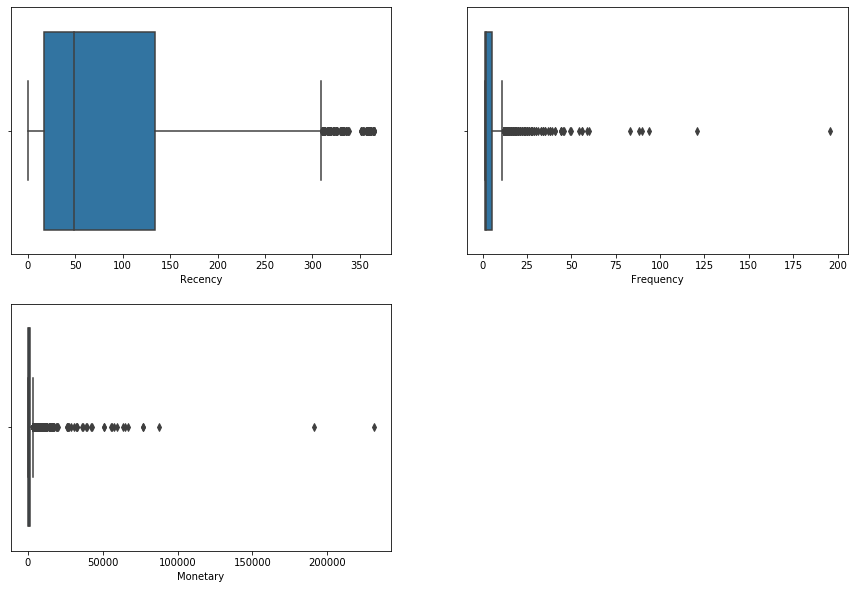

In [44]:
fig = plt.figure(figsize = (15,10))
axes = 220
for num in numerical:
    axes += 1
    fig.add_subplot(axes)
    sns.boxplot(data = rfm_df, x = num)
plt.show()

No handles with labels found to put in legend.


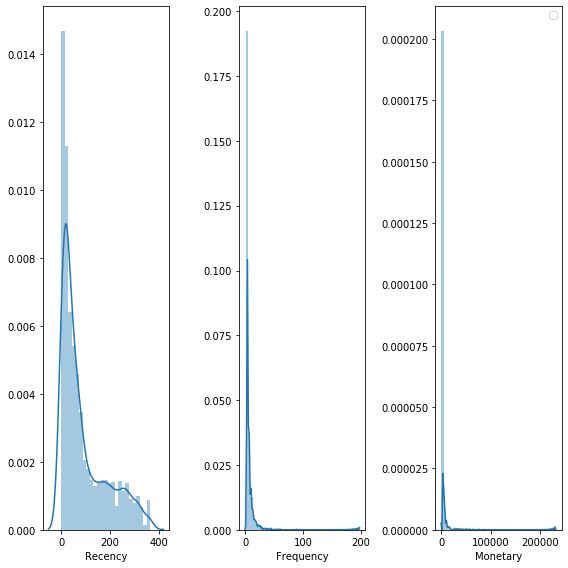

In [45]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(8,8))
sns.distplot(rfm_df["Recency"], ax=ax1)
sns.distplot(rfm_df["Frequency"], ax=ax2)
sns.distplot(rfm_df["Monetary"], ax=ax3)
plt.tight_layout()
plt.legend()

# Normalization:

In [46]:
rfm_df

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,325,1,77183.60
12747.0,2,10,3837.45
12748.0,0,196,30895.87
12749.0,3,5,4090.88
12820.0,3,4,942.34
...,...,...,...
18280.0,277,1,180.60
18281.0,180,1,80.82
18282.0,7,2,178.05


In [47]:
#log transformation
rfm_df_logr = np.log(rfm_df['Recency']+0.1) #can't take log(0) and so add a small number
rfm_df_logf = np.log(rfm_df['Frequency'])
rfm_df_logm = np.log(rfm_df['Monetary']+0.1)
log_df = pd.DataFrame({'Recency': rfm_df_logr,'Frequency': rfm_df_logf,'Monetary': rfm_df_logm})
log_df.head()

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,5.784133,0.000000,11.253944
12747.0,0.741937,2.302585,8.252589
12748.0,-2.302585,5.278115,10.338381
12749.0,1.131402,1.609438,8.316540
12820.0,1.131402,1.386294,6.848472


In [48]:
def load_data(product, seq_len):
    #log_df_raw = product.as_matrix() # convert to numpy array
    log_df = []
    
    # create all possible sequences of length seq_len
    for index in range(len( log_df) - seq_len): 
        merged_left.append( log_df_raw[index: index + seq_len])
    
    log_df = np.array(log_df);
    valid_set_size = int(np.round(valid_set_size_percentage/100*log_df.shape[0]));  
    test_set_size = int(np.round(test_set_size_percentage/100* log_df.shape[0]));
    train_set_size = log_df.shape[0] - (valid_set_size + test_set_size);
    
    x_train =  log_df[:train_set_size,:-1,:]
    y_train =  log_df[:train_set_size,-1,:]
    
    x_valid =   log_df[train_set_size:train_set_size+valid_set_size,:-1,:]
    y_valid =   log_df[train_set_size:train_set_size+valid_set_size,-1,:]
    
    x_test =    log_df[train_set_size+valid_set_size:,:-1,:]
    y_test =    log_df[train_set_size+valid_set_size:,-1,:]
    
    return [x_train, y_train, x_valid, y_valid, x_test, y_test]

In [49]:
seq_len = 20 # choose sequence length
x_train, y_train, x_valid, y_valid, x_test, y_test = load_data(log_df, seq_len)

IndexError: too many indices for array: array is 1-dimensional, but 3 were indexed

In [ ]:
index_in_epoch = 0;
perm_array  = np.arange(x_train.shape[0])
np.random.shuffle(perm_array)

# function to get the next batch
def get_next_batch(batch_size):
    global index_in_epoch, x_train, perm_array   
    start = index_in_epoch
    index_in_epoch += batch_size
    
    if index_in_epoch > x_train.shape[0]:
        np.random.shuffle(perm_array) # shuffle permutation array
        start = 0 # start next epoch
        index_in_epoch = batch_size
        
    end = index_in_epoch
    return x_train[perm_array[start:end]], y_train[perm_array[start:end]]

# parameters
n_steps = seq_len-1 
n_inputs = 4 
n_neurons = 200 
n_outputs = 4
n_layers = 2
learning_rate = 0.001
batch_size = 50
n_epochs = 100 
train_set_size = x_train.shape[0]
test_set_size = x_test.shape[0]

tf.reset_default_graph()

X = tf.placeholder(tf.float32, [None, n_steps, n_inputs])
y = tf.placeholder(tf.float32, [None, n_outputs])

# use Basic RNN Cell
layers = [tf.contrib.rnn.BasicRNNCell(num_units=n_neurons, activation=tf.nn.sigmoid)
          for layer in range(n_layers)]

# use GRU cell
#layers = [tf.contrib.rnn.GRUCell(num_units=n_neurons, activation=tf.nn.leaky_relu)
#          for layer in range(n_layers)]
                                                                     
multi_layer_cell = tf.contrib.rnn.MultiRNNCell(layers)
rnn_outputs, states = tf.nn.dynamic_rnn(multi_layer_cell, X, dtype=tf.float32)

stacked_rnn_outputs = tf.reshape(rnn_outputs, [-1, n_neurons]) 
stacked_outputs = tf.layers.dense(stacked_rnn_outputs, n_outputs)
outputs = tf.reshape(stacked_outputs, [-1, n_steps, n_outputs])
outputs = outputs[:,n_steps-1,:] # keep only last output of sequence
                                              
loss = tf.reduce_mean(tf.square(outputs - y)) # loss function = mean squared error 
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate) 
training_op = optimizer.minimize(loss)
                                              
# run graph
with tf.Session() as sess: 
    sess.run(tf.global_variables_initializer())
    for iteration in range(int(n_epochs*train_set_size/batch_size)):
        x_batch, y_batch = get_next_batch(batch_size) # fetch the next training batch 
        sess.run(training_op, feed_dict={X: x_batch, y: y_batch}) 
        if iteration % int(5*train_set_size/batch_size) == 0:
            mse_train = loss.eval(feed_dict={X: x_train, y: y_train}) 
            mse_valid = loss.eval(feed_dict={X: x_valid, y: y_valid}) 
            print('%.2f epochs: MSE train/valid = %.6f/%.6f'%(
                iteration*batch_size/train_set_size, mse_train, mse_valid))

    y_train_pred = sess.run(outputs, feed_dict={X: x_train})
    y_valid_pred = sess.run(outputs, feed_dict={X: x_valid})
    y_test_pred = sess.run(outputs, feed_dict={X: x_test})
    

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(8,8))
sns.distplot(log_df["Recency"], ax=ax1)
sns.distplot(log_df["Frequency"], ax=ax2)
sns.distplot(log_df["Monetary"], ax=ax3)
plt.tight_layout()
plt.legend()

Correlation after normalizatioin

In [ ]:
sns.heatmap(log_df.corr())

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
cluster_scaled = scaler.fit_transform(log_df)

# Models Making

# 1- K-means (By Elbow Method & silhouette Method)

# 2- Mini Batch K-means

# Ellbow Method

Finding the value of k

In [ ]:
from sklearn.cluster import KMeans

Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(cluster_scaled)
    Sum_of_squared_distances.append(km.inertia_)
plt.figure(figsize=(20,5))
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

From the figure above we can see that the most optimal values are 3

# Applying K Means

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
matrix = log_df.to_numpy()
model = KMeans(n_clusters=3)
model.fit(matrix)
kmeans_labels = model.labels_

fig = plt.figure(num=None, figsize=(15, 10), dpi=80, facecolor='w', edgecolor='k')
ax = plt.axes(projection="3d")

ax.scatter3D(matrix[:,0],matrix[:,1],matrix[:,2],c=kmeans_labels, cmap='viridis')

xLabel = ax.set_xlabel('Recency', linespacing=3.2)
yLabel = ax.set_ylabel('Frequency', linespacing=3.1)
zLabel = ax.set_zlabel('Monetary', linespacing=3.4)
print("K-Means")

# Silhouette Method

In [ ]:
matrix = log_df.to_numpy()
for n_clusters in range(2,10):
    kmeans = KMeans(init='k-means++', n_clusters = n_clusters, n_init=100)
    kmeans.fit(matrix)
    clusters = kmeans.predict(matrix)
    silhouette_avg = silhouette_score(matrix, clusters)
    print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg)

In [ ]:
n_clusters = 3
kmeans = KMeans(init='k-means++', n_clusters = n_clusters, n_init=30)
kmeans.fit(matrix)
clusters_customers = kmeans.predict(matrix)
silhouette_avg = silhouette_score(matrix, clusters_customers)
print('score de silhouette: {:<.3f}'.format(silhouette_avg))

In [ ]:
#create a scatter plot
plt.scatter(matrix[:, 0], matrix[:, 1], c=clusters_customers, s=50, cmap='viridis')
#select cluster centers
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

# Mini Batch K Means

In [ ]:
from sklearn.cluster import MiniBatchKMeans
from mpl_toolkits.mplot3d import Axes3D
matrix = log_df.to_numpy()
model = MiniBatchKMeans(n_clusters=3, init='k-means++', max_iter=100, batch_size=1000)
model.fit(matrix)
mkmeans_labels = model.labels_

fig = plt.figure(num=None, figsize=(15, 10), dpi=80, facecolor='w', edgecolor='k')
ax = plt.axes(projection="3d")

ax.scatter3D(matrix[:,0],matrix[:,1],matrix[:,2],c=mkmeans_labels, cmap='viridis')

xLabel = ax.set_xlabel('Recency', linespacing=3.2)
yLabel = ax.set_ylabel('Frequency', linespacing=3.1)
zLabel = ax.set_zlabel('Monetary', linespacing=3.4)
print("K-Means")

# Clusters

In [ ]:
## Cluster By K Means
DS3_clustered_kmeans = rfm_df.assign(Cluster=kmeans_labels)
grouped_kmeans = DS3_clustered_kmeans.groupby(['Cluster']).mean().round(1)
grouped_kmeans

In [ ]:
# Clusters by Silhouette Method
DS3_clustered_Silhouette = rfm_df.assign(Cluster=clusters_customers)
grouped_kmeans = DS3_clustered_Silhouette.groupby(['Cluster']).mean().round(1)
grouped_kmeans

In [ ]:
pd.DataFrame(pd.Series(mkmeans_labels).value_counts(), columns = ['Number of Customers'])

The table shows centroids of each clusters that could determine the clusters rule. These are:

Cluster 0: High Monetary, Very Recent and very frequent

Cluster 1: Very Low Monetary, Very low recency and Very low frequency

Cluster 2: Moderate Monetary, moderate recency and low frequency